In [1]:
import os
import re
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath("../"))
from dataset import DS_DIMENSIONS, DS_NAMES
from utilities.figure_tools import (get_latest_results_directory, load_results,
                                    make_fig_directory)

cmap = plt.get_cmap("Set1")
colors = cmap.colors

results_path = "../results/perturbations-semirand/"
output_dir = "./perturbations-semirand/"
export_figures = True
fig_type = ".png"
use_titles = True
use_legend = True

if export_figures and not os.path.isdir(output_dir):
    os.makedirs(output_dir)

In [2]:
df = pd.read_csv(results_path + "perturbations.csv")
df.head()

,iteration,explainer,dataset,instance,perturbation_size,nperturbations,per_valid
0,0,FACETIndex,cancer,512,0.00001,100,1.0
1,0,OCEAN,cancer,512,0.00001,100,1.0
2,0,FACETIndex,cancer,512,0.00002,100,1.0
3,0,OCEAN,cancer,512,0.00002,100,1.0
4,0,FACETIndex,cancer,512,0.00003,100,1.0


In [3]:
all_results = df.groupby(["dataset", "explainer", "perturbation_size"], as_index=False).mean()
print("explainers:", list(all_results["explainer"].unique()))
print("datasets:", list(all_results["dataset"].unique()))
print("pert_sizes:", list(all_results["perturbation_size"].unique()))
all_results.head()

explainers: ['FACETIndex', 'OCEAN']
datasets: ['cancer', 'glass', 'magic', 'spambase', 'vertebral']
pert_sizes: [1e-05, 2e-05, 3e-05, 4e-05, 5e-05, 6e-05, 7e-05, 8e-05, 9e-05, 0.0001, 0.00011, 0.00012, 0.00013, 0.00014, 0.00015, 0.00016, 0.00017, 0.00018, 0.00019, 0.0002, 0.00021, 0.00022, 0.00023, 0.00024, 0.00025, 0.00026, 0.00027, 0.00028, 0.00029, 0.0003, 0.00031, 0.00032, 0.00033, 0.00034, 0.00035, 0.00036, 0.00037, 0.00038, 0.00039, 0.0004, 0.00041, 0.00042, 0.00043, 0.00044, 0.00045, 0.00046, 0.00047, 0.00048, 0.00049, 0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006, 0.0065, 0.007, 0.0075, 0.008, 0.0085, 0.009, 0.0095, 0.01, 0.0105, 0.011, 0.0115, 0.012, 0.0125, 0.013, 0.0135, 0.014, 0.0145, 0.015, 0.0155, 0.016, 0.0165, 0.017, 0.0175, 0.018, 0.0185, 0.019, 0.0195, 0.02, 0.0205, 0.021, 0.0215, 0.022, 0.0225, 0.023, 0.0235, 0.024, 0.0245, 0.025, 0.0255, 0.026, 0.0265, 0.027, 0.0275, 0.028, 0.0285, 0.029, 0.0295, 0.03, 0.0305, 0.031, 0.0315

,dataset,explainer,perturbation_size,iteration,instance,nperturbations,per_valid
0,cancer,FACETIndex,0.00001,4.5,325.8,100.0,1.0
1,cancer,FACETIndex,0.00002,4.5,325.8,100.0,1.0
2,cancer,FACETIndex,0.00003,4.5,325.8,100.0,1.0
3,cancer,FACETIndex,0.00004,4.5,325.8,100.0,1.0
4,cancer,FACETIndex,0.00005,4.5,325.8,100.0,1.0


In [4]:
cmap = plt.get_cmap("tab10")
colors = cmap.colors
ds_colors = {
    "cancer": colors[0],
    "glass": colors[1],
    "magic": colors[2],
    "spambase": colors[3],
    "vertebral": colors[4]
}
epl_colors = {
    "AFT": colors[0],
    "FACETIndex": colors[1],
    "OCEAN": colors[2],
    "RFOCSE": colors[3],
    "MACE": colors[4]
}
explainer_markers = {
    "AFT": "o",
    "FACETIndex": "^",
    "OCEAN": "s",
    "RFOCSE": "v",
    "MACE": "D"
}
marker_size = 0
line_width = 2
marker_sizes = {
    "AFT": marker_size,
    "FACETIndex": marker_size,
    "OCEAN": marker_size,
    "RFOCSE": marker_size,
    "MACE": marker_size
}
pretty_explainer_names = {
    "AFT": "AFT",
    "FACETIndex": "FACET",
    "OCEAN": "OCEAN",
    "RFOCSE": "RFOCSE",
    "MACE": "MACE",
}

In [5]:
def render_plot(xfeature, yfeature, xlabel, ylabel, title, save_name=None, xrange=None, yrange=None, xlog=False, lloc=None, ylog=False):

    for ds in all_results["dataset"].unique():
        plt.figure()
        is_ds = all_results["dataset"] == ds
        for expl in all_results["explainer"].unique():
            is_expl = all_results["explainer"] == expl
            matching_rows = is_ds & is_expl
            plt.plot(all_results[matching_rows][xfeature], all_results[matching_rows][yfeature], label=expl, marker=explainer_markers[expl], lw=line_width, ms=marker_sizes[expl])

        plt.xlabel(xlabel, fontsize=25)
        plt.ylabel(ylabel, fontsize=25)
        if use_titles:
            plt.title(ds, x=0, y=1, fontsize=25)
        
        if ylog:
            plt.yscale('log')
        if xrange is not None:
            plt.xlim(xrange)
        if yrange is not None:
            plt.ylim(yrange)

        plt.xticks(fontsize=20, rotation="vertical")
        plt.yticks(fontsize=20)

        if use_legend:
            expl_names = [pretty_explainer_names[_] for _ in all_results["explainer"].unique()]
            plt.legend(expl_names, loc="upper right", ncol=len(all_results["explainer"].unique()), handletextpad=0.5, columnspacing=1, handlelength=1.5, prop={"size":20}, bbox_to_anchor=(0, 1.18, 0.95, 0),) # 

        if export_figures and save_name is not None:
            plt.savefig(output_dir + save_name + "_" + ds + fig_type, bbox_inches="tight")

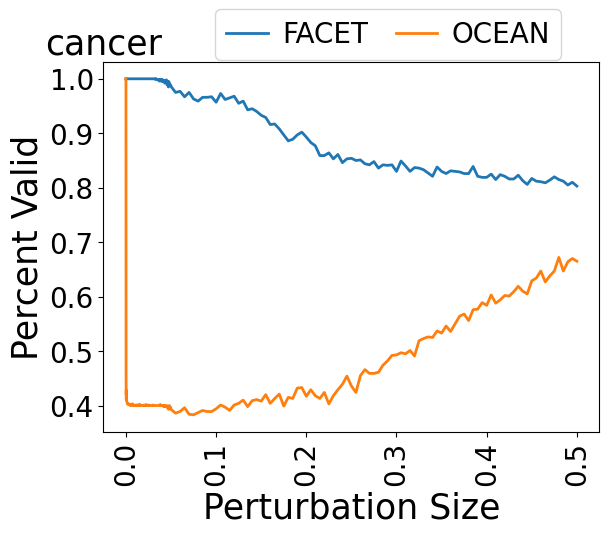

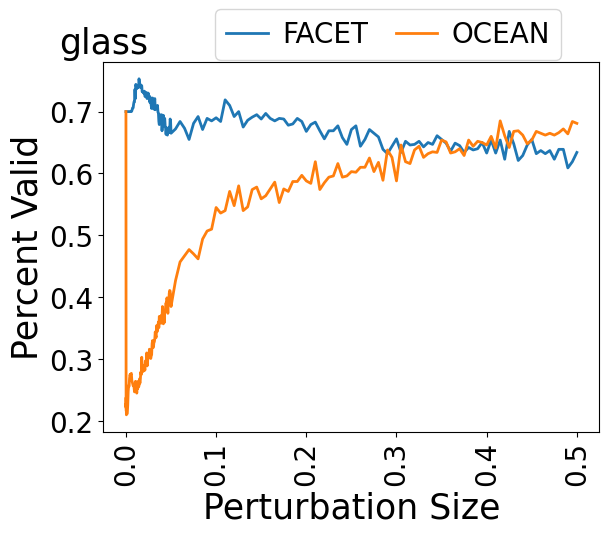

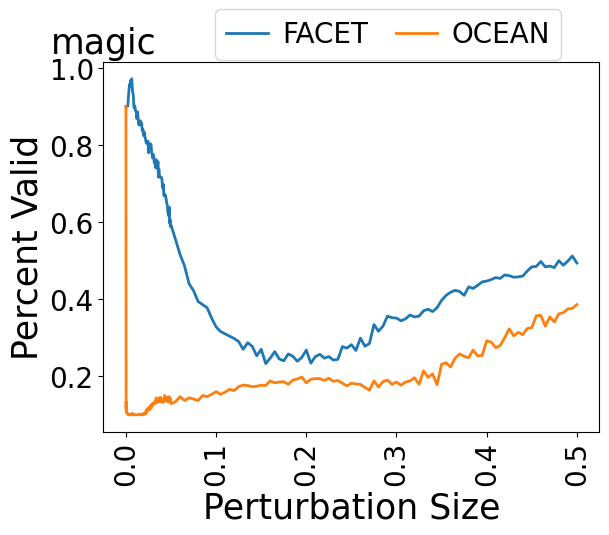

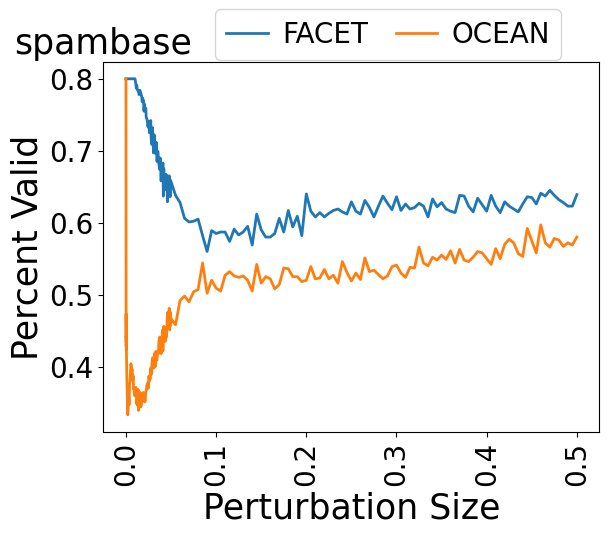

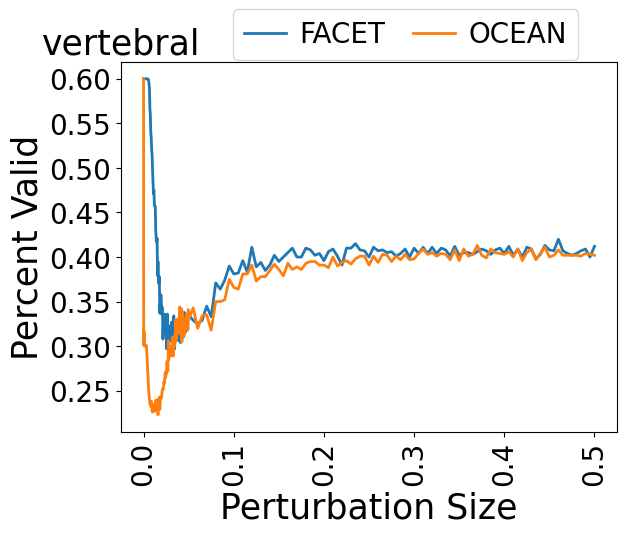

In [6]:
render_plot("perturbation_size", "per_valid", "Perturbation Size", "Percent Valid", "Rate of Explanation Failure", save_name="perturbation_valid")